## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

## Leitura dos Dados

In [2]:
Games_dados = pd.read_csv("../dados/vgsales-12-4-2019.csv")

## Explorando os Dados

In [3]:
Games_dados.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
Games_dados.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

In [5]:
Games_dados.shape

(55792, 23)

* Olhada inicial nos dados , mostrando um pouco do dataset(colunas e o shape)

### Verificando algumas variaveis de interesse
* olhar a distribuição de Global Sales
* olhar genre
* olhar platform

### Global Sales

In [6]:
Games_dados.Global_Sales.mean()

0.3655029616276456

In [7]:
Games_dados.Global_Sales.median()

0.12

In [8]:
Games_dados.Global_Sales.mode()

0    0.0
dtype: float64

In [9]:
# Dado um conjunto de dados, a variância é uma medida de dispersão que mostra o quão distante cada valor desse conjunto 
# está do valor central (médio). Quanto menor é a variância, mais próximos os valores estão da média; 
# mas quanto maior ela é, mais os valores estão distantes da média.
Games_dados.Global_Sales.var()

0.6939250161521385

In [10]:
# Um baixo desvio padrão indica que os pontos dos dados tendem a estar próximos da média ou do valor esperado. 
# Um alto desvio padrão indica que os pontos dos dados 
# estão espalhados por uma ampla gama de valores.
Games_dados.Global_Sales.std()

0.833021618058102

In [11]:
Games_dados.Global_Sales.describe()

count    19415.000000
mean         0.365503
std          0.833022
min          0.000000
25%          0.030000
50%          0.120000
75%          0.360000
max         20.320000
Name: Global_Sales, dtype: float64

#### Observado: 
* Media muito distante da mediana e variancia e desvio padrão altos. Indicação de que pode haver outliers.
* A moda do Global Sales é zero. Indicação de que podem existir muitos valores Nan

#### Plotar alguns  graficos para melhor vizualização.

In [12]:
Games_dados.Global_Sales.hist()

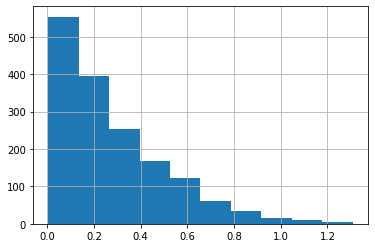

In [13]:
Games_dados['Log_Global_Sales'] = Games_dados['Global_Sales'].apply(np.log10)
Games_dados[Games_dados['Log_Global_Sales'] > 0]['Log_Global_Sales'].hist()

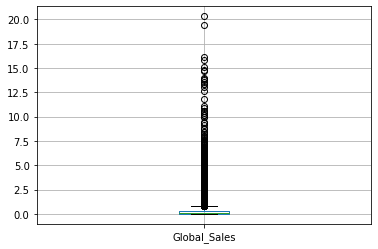

In [14]:
Games_dados.boxplot(column=['Global_Sales'])

* Possiveis outliers
    * Valores Grandes
    * Valores zerados/Nan

In [15]:
# Verificando os valores maiores
Games_dados.Global_Sales.sort_values(ascending = False).head(10)

19    20.32
20    19.39
30    16.15
32    15.86
34    15.09
40    14.82
41    14.74
45    13.94
46    13.86
47    13.80
Name: Global_Sales, dtype: float64

In [16]:
# Verificando zerados/Nan
print(Games_dados.Global_Sales.sort_values().head(10),'\n')
print('Qtd de Nan: ',Games_dados.Global_Sales.isnull().sum())

21241    0.0
20316    0.0
20317    0.0
20318    0.0
20319    0.0
20320    0.0
20321    0.0
20322    0.0
20323    0.0
20324    0.0
Name: Global_Sales, dtype: float64 

Qtd de Nan:  36377


* Valores Grandes: diferença não tão grande.
    * Valores dentro do intervalo [20:0]
* Valores Pequenos/Nan: 
    * Muitos valores Nan

### Genre

In [17]:
Games_dados.Genre.mode()

0    Misc
dtype: object

In [18]:
Games_dados.Genre.describe()

count     55792
unique       20
top        Misc
freq       9476
Name: Genre, dtype: object

In [19]:
print('Qtd de Nan: ',Games_dados.Genre.isnull().sum())

Qtd de Nan:  0


#### Observado: 
* Misc é o Genre que mais aparece no dataset, com uma freq de 9476 em 55792
* Não possui valor Nan

#### Plotar alguns  graficos para melhor vizualização.

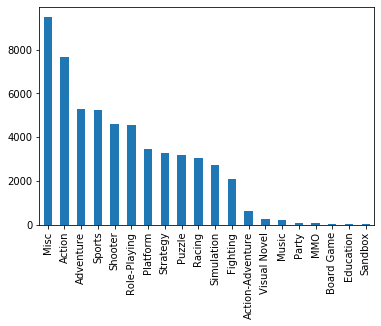

In [20]:
Games_dados.Genre.value_counts().plot.bar()

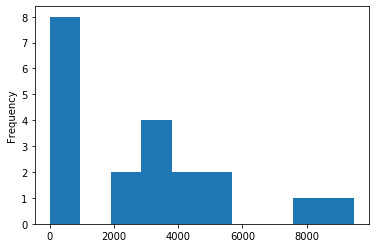

In [21]:
Games_dados.Genre.value_counts().plot.hist()

### Platform

In [22]:
Games_dados.Platform.mode()

0    PC
dtype: object

In [23]:
Games_dados.Platform.describe()

count     55792
unique       74
top          PC
freq      10978
Name: Platform, dtype: object

In [24]:
print('Qtd de Nan: ',Games_dados.Platform.isnull().sum())

Qtd de Nan:  0


#### Observado: 
* PC é a PLatform que mais aparece no dataset, com uma freq de 10978 em 55792.
* Não possui valor Nan

#### Plotar alguns  graficos para melhor vizualização.

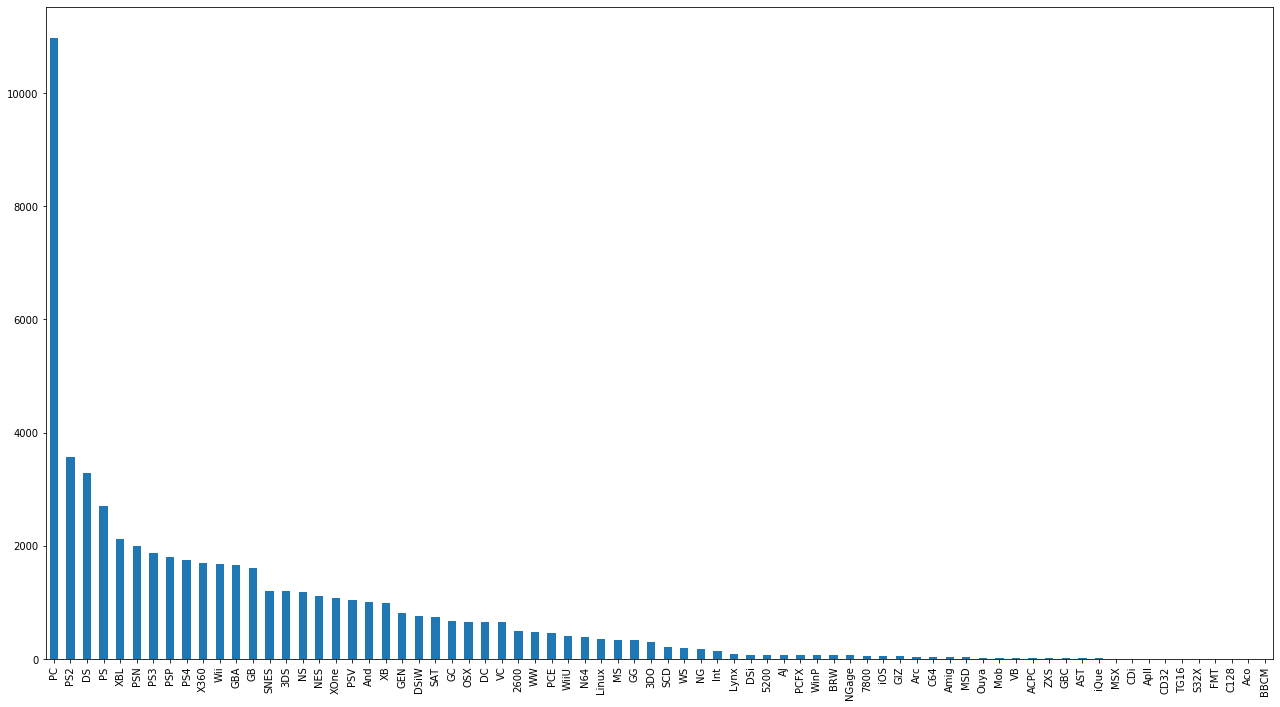

In [25]:
Games_dados.Platform.value_counts().plot(kind='bar', figsize=(22,12))

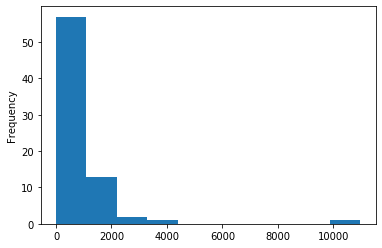

In [26]:
Games_dados.Platform.value_counts().plot(kind='hist')

### Ajustar os Dados

In [27]:
Games_dados.dtypes

Rank                  int64
Name                 object
basename             object
Genre                object
ESRB_Rating          object
Platform             object
Publisher            object
Developer            object
VGChartz_Score      float64
Critic_Score        float64
User_Score          float64
Total_Shipped       float64
Global_Sales        float64
NA_Sales            float64
PAL_Sales           float64
JP_Sales            float64
Other_Sales         float64
Year                float64
Last_Update          object
url                  object
status                int64
Vgchartzscore       float64
img_url              object
Log_Global_Sales    float64
dtype: object

In [28]:
#ajustando tipos dos dados
Games_dados['Name'] = Games_dados['Name'].astype('category')
Games_dados['basename'] = Games_dados['basename'].astype('category')
Games_dados['Genre'] = Games_dados['Genre'].astype('category')
Games_dados['Platform'] = Games_dados['Platform'].astype('category')
Games_dados['Publisher'] = Games_dados['Publisher'].astype('category')
Games_dados['Developer'] = Games_dados['Developer'].astype('category')
Games_dados['Last_Update'] = Games_dados['Last_Update'].astype('category')
Games_dados['ESRB_Rating'] = Games_dados['ESRB_Rating'].astype('category')
Games_dados['img_url'] = Games_dados['img_url'].astype('category')
Games_dados['url'] = Games_dados['url'].astype('category')

In [29]:
Games_dados.dtypes

Rank                   int64
Name                category
basename            category
Genre               category
ESRB_Rating         category
Platform            category
Publisher           category
Developer           category
VGChartz_Score       float64
Critic_Score         float64
User_Score           float64
Total_Shipped        float64
Global_Sales         float64
NA_Sales             float64
PAL_Sales            float64
JP_Sales             float64
Other_Sales          float64
Year                 float64
Last_Update         category
url                 category
status                 int64
Vgchartzscore        float64
img_url             category
Log_Global_Sales     float64
dtype: object

* Tipos de dados ajustados para Categoricos

### Novas Variaveis
* Usaremos o cat.code para que seja possivel mostrar a covariancia de variveis categoricas
    * Variaveis usadas serão: genre e platform

* Novas Variaveis
    * Code_Genre
    * Code_Platform

In [30]:
Games_dados['Genre'].cat.categories

Index(['Action', 'Action-Adventure', 'Adventure', 'Board Game', 'Education',
       'Fighting', 'MMO', 'Misc', 'Music', 'Party', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Sandbox', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'Visual Novel'],
      dtype='object')

In [31]:
Games_dados['Platform'].cat.categories 

Index(['2600', '3DO', '3DS', '5200', '7800', 'ACPC', 'AJ', 'AST', 'Aco',
       'Amig', 'And', 'ApII', 'Arc', 'BBCM', 'BRW', 'C128', 'C64', 'CD32',
       'CDi', 'DC', 'DS', 'DSi', 'DSiW', 'FMT', 'GB', 'GBA', 'GBC', 'GC',
       'GEN', 'GG', 'GIZ', 'Int', 'Linux', 'Lynx', 'MS', 'MSD', 'MSX', 'Mob',
       'N64', 'NES', 'NG', 'NGage', 'NS', 'OSX', 'Ouya', 'PC', 'PCE', 'PCFX',
       'PS', 'PS2', 'PS3', 'PS4', 'PSN', 'PSP', 'PSV', 'S32X', 'SAT', 'SCD',
       'SNES', 'TG16', 'VB', 'VC', 'WS', 'WW', 'Wii', 'WiiU', 'WinP', 'X360',
       'XB', 'XBL', 'XOne', 'ZXS', 'iOS', 'iQue'],
      dtype='object')

In [32]:
#Games_dados['Genre'] = Games_dados['Genre'].cat.codes
#Games_dados['Platform'] = Games_dados['Platform'].cat.codes
Games_dados['Code_Genre'] = Games_dados['Genre'].cat.codes
Games_dados['Code_Platform'] = Games_dados['Platform'].cat.codes

In [33]:
Games_dados.dtypes

Rank                   int64
Name                category
basename            category
Genre               category
ESRB_Rating         category
Platform            category
Publisher           category
Developer           category
VGChartz_Score       float64
Critic_Score         float64
User_Score           float64
Total_Shipped        float64
Global_Sales         float64
NA_Sales             float64
PAL_Sales            float64
JP_Sales             float64
Other_Sales          float64
Year                 float64
Last_Update         category
url                 category
status                 int64
Vgchartzscore        float64
img_url             category
Log_Global_Sales     float64
Code_Genre              int8
Code_Platform           int8
dtype: object

In [34]:
Games_dados.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url,Log_Global_Sales,Code_Genre,Code_Platform
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,NaN,17,64
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg,NaN,10,39
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,NaN,12,64
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,NaN,15,45
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,NaN,17,64


## Estatisticas Bivariadas
* Verificar relação entre algumas variaveis

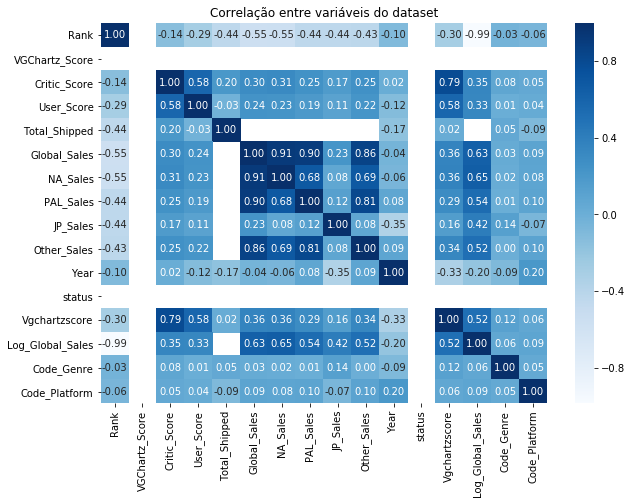

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(Games_dados.corr(),annot = True,fmt = '.2f',cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

#### Observado: 
* Global Sales tem uma forte relação com as variaveis (NA sales, PAL sales, JP sales e Other sales) ** ja era esperado **.
 * Principalment com NA_Sales e PAL_Sales
   * NA_SAles (vendas na area Norte Americana)
   * PAL_Sales (vendas na area europeia)
   

* Baixa covariancia entre as variaveis de interesse
    * Genre corr de 0.03 Global Sales
    * Platform corr 0.09 Global Sales

### Plotar alguns  graficos para melhor vizualização da relação entre as variaveis de interesse usadas no começo da exploração dos dados.
    * Genre/GlobalSales
    * Platform/GlobalSales

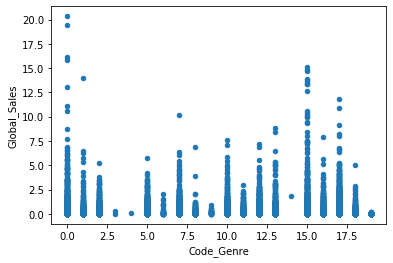

In [36]:
Games_dados.plot.scatter(x='Code_Genre',y='Global_Sales',)

#### Grafico Acima mostra a relação entre Global Sales e genre
* Mostra a qtd de vendas por genero
    * Alguns pontos(em cada genero) estão distantes, podendo ser outliers que estão influenciando a relação

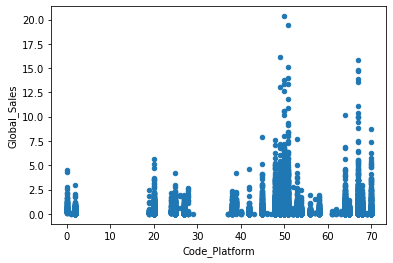

In [37]:
Games_dados.plot.scatter(y='Global_Sales',x='Code_Platform')

#### Grafico Acima mostra a relação entre Global Sales e Platform
* Mostra a qtd de vendas por plataforma (PC,ps2,ps3,ps4...)
    * Alguns pontos(em cada plataforma) estão distantes, podendo ser outliers que estão influenciando a relação.

### Verificar dados Ausentes

In [38]:
print(Games_dados.isnull().sum())
print('\n',Games_dados.shape)

Rank                    0
Name                    0
basename                0
Genre                   0
ESRB_Rating         32169
Platform                0
Publisher               0
Developer              17
VGChartz_Score      55792
Critic_Score        49256
User_Score          55457
Total_Shipped       53965
Global_Sales        36377
NA_Sales            42828
PAL_Sales           42603
JP_Sales            48749
Other_Sales         40270
Year                  979
Last_Update         46606
url                     0
status                  0
Vgchartzscore       54993
img_url                 0
Log_Global_Sales    36377
Code_Genre              0
Code_Platform           0
dtype: int64

 (55792, 26)


#### Dados ausentes NAn
* Remoção de Dados (Colunas)
    * 'Vgchartzscore', 'VGChartz_Score' com mais de 54000 dados ausentes
    * Remoção da coluna Log_Global_Sales (já utilizada)

In [39]:
Games_dados.drop(['Vgchartzscore', 'VGChartz_Score'], axis='columns', inplace=True)
Games_dados.shape

(55792, 24)

In [40]:
Games_dados.drop(['Log_Global_Sales'], axis='columns', inplace=True)

### Descrição dos dados apos a remoção das colunas

In [41]:
Games_dados.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Code_Genre,Code_Platform
count,55792.000000,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,55792.000000,55792.000000
mean,27896.500000,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,9.339439,43.731090
std,16105.907446,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,6.028657,16.889183
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,0.000000,0.000000
25%,13948.750000,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,5.000000,34.000000
50%,27896.500000,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,10.000000,45.000000
75%,41844.250000,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,15.000000,53.000000
max,55792.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,19.000000,73.000000


## Verificando Relaçao de vendas mais a fundo
* Por genre
* por PLatform

* Verificando vendas por genero

In [42]:
# Total de vendas por genre *todos possuem valor agregado
Games_dados.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Interessante: Misc é a moda porem não foi o mais vendido

Genre
Sports              1228.20
Action              1206.82
Shooter             1051.74
Misc                 596.64
Racing               547.71
Role-Playing         502.12
Platform             424.51
Fighting             363.98
Adventure            346.17
Simulation           320.32
Action-Adventure     155.45
Strategy             144.22
Puzzle               132.54
Music                 52.81
MMO                   11.86
Party                  5.39
Visual Novel           3.47
Sandbox                1.89
Board Game             0.31
Education              0.09
Name: Global_Sales, dtype: float64

#### Observado: 
* Misc é a moda de genero porem não é a que mais vendeu
    * Genre mais vendido Sports (Misc sendo o 4 mais rentável)

#### Plotar Graficos para melhor vizualização 

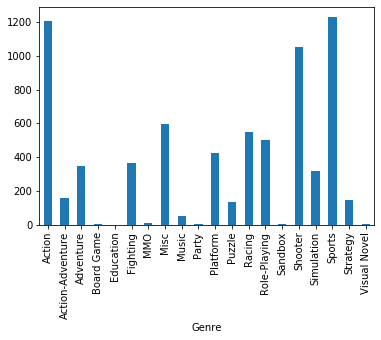

In [43]:
Games_dados.groupby('Genre')['Global_Sales'].sum().plot.bar()

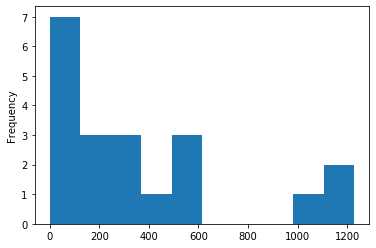

In [44]:
Games_dados.groupby('Genre')['Global_Sales'].sum().plot.hist()

* verificando vendas por platform

In [45]:
# Total de vendas por platform (alguns estão zerados)
print(Games_dados.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(20))
print('\n',Games_dados.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).tail(10))

# Interessante: PC é a moda porem não foi o mais vendido

Platform
PS2     1103.62
PS3      905.72
X360     889.49
PS       627.06
PS4      585.09
Wii      500.39
DS       469.65
XOne     278.56
PSP      263.71
XB       237.72
GBA      231.41
PC       198.54
GC       121.54
3DS      117.77
N64      100.62
2600      89.27
SNES      69.45
PSV       65.37
NS        49.88
NES       47.93
Name: Global_Sales, dtype: float64

 Platform
NGage    0.0
iOS      0.0
MSD      0.0
MS       0.0
Lynx     0.0
Linux    0.0
Int      0.0
GIZ      0.0
FMT      0.0
MSX      0.0
Name: Global_Sales, dtype: float64


#### Observado: 
* Pc é a moda de platform porem não é a que mais vendeu
    * Platform mais vendido PS2
        * Pc não entra na lista de 10 mais rentaveis.

#### Plotar Graficos para melhor vizualização 

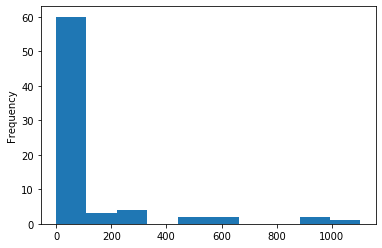

In [46]:
Games_dados.groupby('Platform')['Global_Sales'].sum().plot.hist()

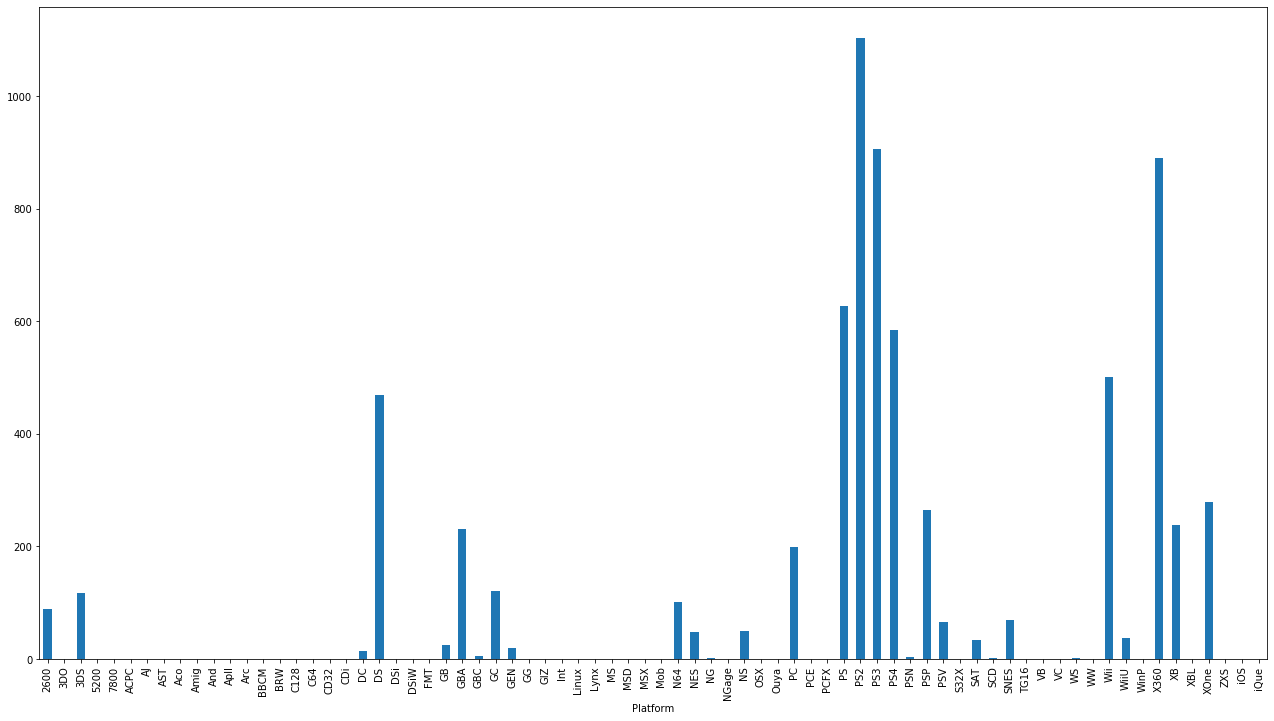

In [47]:
Games_dados.groupby('Platform')['Global_Sales'].sum().plot(kind='bar', figsize=(22,12))

In [48]:
print(Games_dados.Global_Sales.isnull().sum())

36377


#### Problema: 
* Voltando para quantidade de valore Nan em Global Sales
    * Foi verificado que isso acontece pois global sales é a soma das outras variaveis XX_Sales porem algumas estão zeradas enquanto outras possuem valor Nan, gerando assim muitos valores Nan em Global Sales
    
#### Ideia de solução:
* Usar median de global sales para melhorar a distribuição de vendas(filtrada por alguma outra variavel ex: genre)
    * median pois temos alguns valores muito afastados da media.(evitar outliers).


### Abaixo mediana de vendas por genero

In [49]:
Games_dados.groupby('Genre')['Global_Sales'].median()

Genre
Action              0.150
Action-Adventure    0.230
Adventure           0.040
Board Game          0.155
Education           0.090
Fighting            0.170
MMO                 0.150
Misc                0.090
Music               0.170
Party               0.135
Platform            0.180
Puzzle              0.060
Racing              0.140
Role-Playing        0.120
Sandbox             1.890
Shooter             0.180
Simulation          0.090
Sports              0.200
Strategy            0.060
Visual Novel        0.020
Name: Global_Sales, dtype: float64

### Abaixo mediana de vendas 
* filtrada :
    * Genre
    * Year
    * Platform

In [50]:
Games_dados.groupby(['Year','Platform','Genre'])['Global_Sales'].median()

Year    Platform  Genre       
1970.0  2600      Action          0.21
        DS        Action           NaN
                  Misc             NaN
                  Role-Playing     NaN
        GBA       Platform         NaN
        PC        Action           NaN
                  Adventure       0.00
                  Fighting         NaN
                  Misc             NaN
                  Puzzle           NaN
                  Racing          0.01
                  Role-Playing    0.42
                  Shooter         0.01
                  Simulation       NaN
                  Sports          0.01
                  Strategy        0.01
        PS2       Fighting         NaN
                  Misc             NaN
                  Role-Playing     NaN
                  Sports           NaN
        PS3       Misc            0.04
                  Puzzle           NaN
                  Role-Playing     NaN
                  Shooter          NaN
        PSN       Puzzle         

#### Preenchendo valores Nan com a mediana do Global Sales pelo genre
* Criando nova variavel:
    * Global_Sales_GenMed = (valores nan de Global Sales preenchidos por median(GS) filtrados pelo genre)

In [51]:
Games_dados['Global_Sales_GenMed'] = Games_dados['Global_Sales'].fillna(Games_dados.groupby('Genre')['Global_Sales'].transform('median'))

In [52]:
print(Games_dados.isnull().sum())

Rank                       0
Name                       0
basename                   0
Genre                      0
ESRB_Rating            32169
Platform                   0
Publisher                  0
Developer                 17
Critic_Score           49256
User_Score             55457
Total_Shipped          53965
Global_Sales           36377
NA_Sales               42828
PAL_Sales              42603
JP_Sales               48749
Other_Sales            40270
Year                     979
Last_Update            46606
url                        0
status                     0
img_url                    0
Code_Genre                 0
Code_Platform              0
Global_Sales_GenMed        0
dtype: int64


In [53]:
Games_dados.Global_Sales_GenMed.mean()

0.20530801907092813

In [54]:
Games_dados.Global_Sales_GenMed.median()

0.12

In [55]:
Games_dados.Global_Sales_GenMed.var()

0.25736594131111284

In [56]:
Games_dados.Global_Sales_GenMed.std()

0.5073124691066767

#### Observado: 
* Diferença entre Media e mediana foi diminuida e valores de variancia e desvio padrão diminuiram bastante.
* Não ainda existem dados faltantes Nan.

#### Plotar graficos para uma melhor vizualização

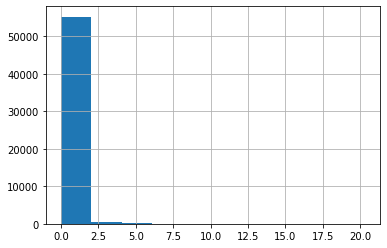

In [57]:
Games_dados.Global_Sales_GenMed.hist()

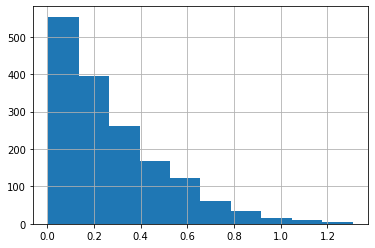

In [58]:
Games_dados['Log_Global_Sales_GenMed'] = Games_dados['Global_Sales_GenMed'].apply(np.log10)
Games_dados[Games_dados['Log_Global_Sales_GenMed'] > 0]['Log_Global_Sales_GenMed'].hist()

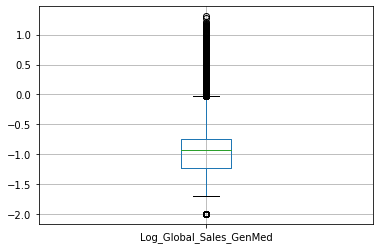

In [59]:
Games_dados.boxplot(column=['Log_Global_Sales_GenMed'])

In [60]:
Games_dados.drop(['Log_Global_Sales_GenMed'], axis='columns', inplace=True)

#### Preenchendo valores Nan com a mediana do Global Sales pelo genre year e platform
* Criando nova variavel:
    * Global_Sales_GypMed = (valores nan de Global Sales preenchidos por median(GS) filtrados pelo genre,year e platform)

In [61]:
Games_dados['Global_Sales_GypMed'] = Games_dados['Global_Sales'].fillna(Games_dados.groupby(['Year','Platform','Genre'])['Global_Sales'].transform('median'))

In [62]:
print(Games_dados.isnull().sum())

Rank                       0
Name                       0
basename                   0
Genre                      0
ESRB_Rating            32169
Platform                   0
Publisher                  0
Developer                 17
Critic_Score           49256
User_Score             55457
Total_Shipped          53965
Global_Sales           36377
NA_Sales               42828
PAL_Sales              42603
JP_Sales               48749
Other_Sales            40270
Year                     979
Last_Update            46606
url                        0
status                     0
img_url                    0
Code_Genre                 0
Code_Platform              0
Global_Sales_GenMed        0
Global_Sales_GypMed    16264
dtype: int64


In [63]:
Games_dados.Global_Sales_GypMed.mean()

0.27946860453354466

In [64]:
Games_dados.Global_Sales_GypMed.median()

0.09

In [65]:
Games_dados.Global_Sales_GypMed.var()

0.4346103995506946

In [66]:
Games_dados.Global_Sales_GypMed.std()

0.6592498764131053

#### Observado: 
* Diferença entre Media e mediana ainda se mantem e valores de variancia e desvio padrão ,antes altos, diminuiram pouco.
* Ainda existem dados faltantes Nan.(Total de nan = 16264)

#### Plotar graficos para uma melhor vizualização

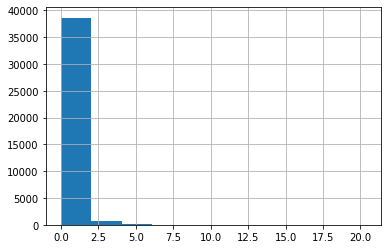

In [67]:
Games_dados.Global_Sales_GypMed.hist()

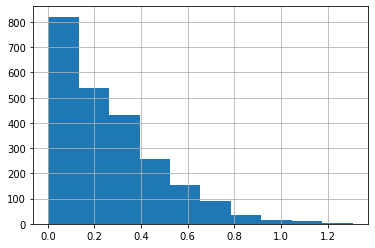

In [68]:
Games_dados['Log_Global_Sales_GypMed'] = Games_dados['Global_Sales_GypMed'].apply(np.log10)
Games_dados[Games_dados['Log_Global_Sales_GypMed'] > 0]['Log_Global_Sales_GypMed'].hist()

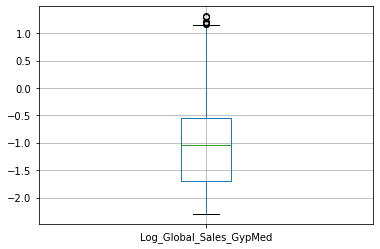

In [69]:
Games_dados.boxplot(column=['Log_Global_Sales_GypMed'])

In [70]:
Games_dados.drop(['Log_Global_Sales_GypMed'], axis='columns', inplace=True)

#### Preenchendo valores Nan com a mediana do Global Sales pelo genre year
* Criando nova variavel:
    * Global_Sales_GyMed = (valores nan de Global Sales preenchidos por median(GS) filtrados pelo genre,year)

In [71]:
Games_dados['Global_Sales_GyMed'] = Games_dados['Global_Sales'].fillna(Games_dados.groupby(['Year','Genre'])['Global_Sales'].transform('median'))

In [72]:
print(Games_dados.isnull().sum())

Rank                       0
Name                       0
basename                   0
Genre                      0
ESRB_Rating            32169
Platform                   0
Publisher                  0
Developer                 17
Critic_Score           49256
User_Score             55457
Total_Shipped          53965
Global_Sales           36377
NA_Sales               42828
PAL_Sales              42603
JP_Sales               48749
Other_Sales            40270
Year                     979
Last_Update            46606
url                        0
status                     0
img_url                    0
Code_Genre                 0
Code_Platform              0
Global_Sales_GenMed        0
Global_Sales_GypMed    16264
Global_Sales_GyMed      2383
dtype: int64


In [73]:
Games_dados.Global_Sales_GyMed.mean()

0.25394371735106896

In [74]:
Games_dados.Global_Sales_GyMed.median()

0.13

In [75]:
Games_dados.Global_Sales_GyMed.var()

0.3098703871107698

In [76]:
Games_dados.Global_Sales_GyMed.std()

0.5566600283034249

#### Observado: 
* Resultado parecido com o filtrado apenas por genero.
   * Diferenças:
    * Diferença entre media e mediana um pouco mais elevada
    * Var e std uma pouco mais elevado.
* Existem valores Nan(total = 2383)   
#### Plotar graficos para uma melhor vizualização

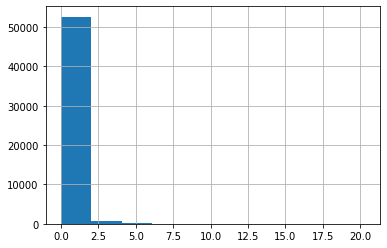

In [77]:
Games_dados.Global_Sales_GyMed.hist()

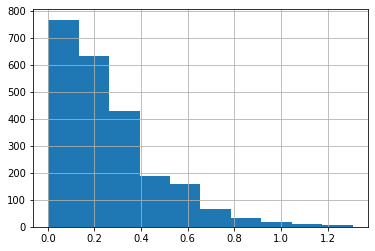

In [78]:
Games_dados['Log_Global_Sales_GyMed'] = Games_dados['Global_Sales_GyMed'].apply(np.log10)
Games_dados[Games_dados['Log_Global_Sales_GyMed'] > 0]['Log_Global_Sales_GyMed'].hist()

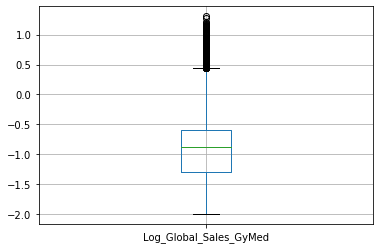

In [79]:
Games_dados.boxplot(column=['Log_Global_Sales_GyMed'])

In [80]:
Games_dados.drop(['Log_Global_Sales_GyMed'], axis='columns', inplace=True)

### Testar Covariancia

* Corr Pearson

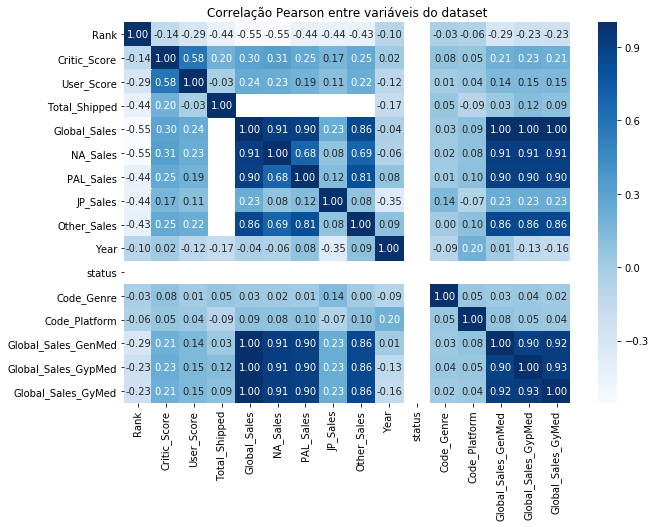

In [81]:
plt.figure(figsize=(10, 7))
sns.heatmap(Games_dados.corr(),annot = True,fmt = '.2f',cmap='Blues')
plt.title('Correlação Pearson entre variáveis do dataset')
plt.show()

* Corr Spearman

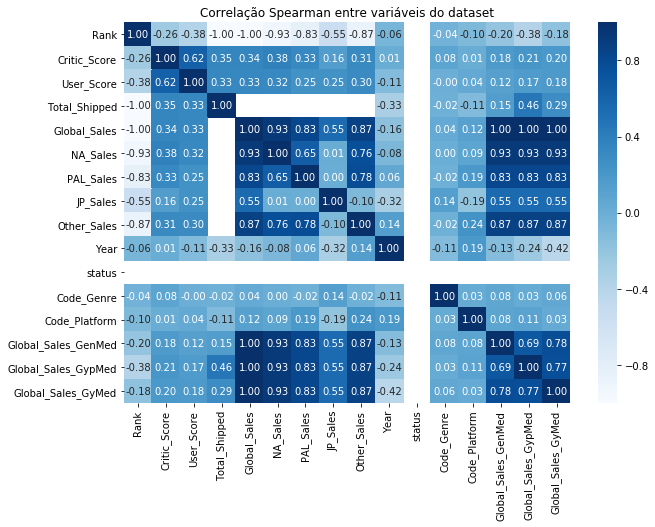

In [82]:
plt.figure(figsize=(10, 7))
sns.heatmap(Games_dados.corr(method='spearman'),annot = True,fmt = '.2f',cmap='Blues')
plt.title('Correlação Spearman entre variáveis do dataset')
plt.show()

### Testes de Hipoteses

* Hipotese 1 
    * Jogos vendem mais de acordo com o genero? Quanto mais popular mais vendido será?

In [83]:
Games_dados.Genre.describe()

count     55792
unique       20
top        Misc
freq       9476
Name: Genre, dtype: object

In [84]:
Games_dados.groupby('Genre')['Global_Sales_GenMed'].sum().sort_values(ascending=False)

Genre
Action              1919.920
Sports              1753.400
Shooter             1604.340
Misc                1245.450
Platform             869.830
Role-Playing         856.480
Racing               770.170
Fighting             565.430
Adventure            481.570
Simulation           464.950
Strategy             288.580
Puzzle               279.240
Action-Adventure     236.410
Music                 61.650
MMO                   18.160
Sandbox               17.010
Party                 12.005
Visual Novel           6.390
Board Game             2.480
Education              1.080
Name: Global_Sales_GenMed, dtype: float64

Text(0.5, 1.0, 'Misc x Action')

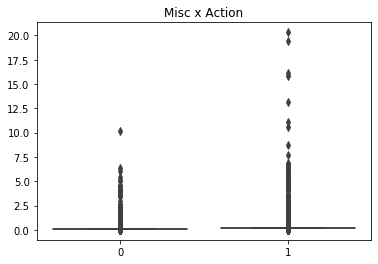

In [85]:
import seaborn as sns
from scipy import stats
# mais popular no dataset
dataMisc = Games_dados[Games_dados['Genre'] == 'Misc']['Global_Sales_GenMed']

# mais vendido
dataAction = Games_dados[Games_dados['Genre'] == 'Action']['Global_Sales_GenMed']

# menos vendido
dataEducation = Games_dados[Games_dados['Genre'] == 'Education']['Global_Sales_GenMed']


sns.boxplot(data=[dataMisc, dataAction]).set_title('Misc x Action')

In [86]:
stats.mannwhitneyu(dataMisc,dataAction)

MannwhitneyuResult(statistic=14960284.5, pvalue=0.0)

Text(0.5, 1.0, 'Misc x Education')

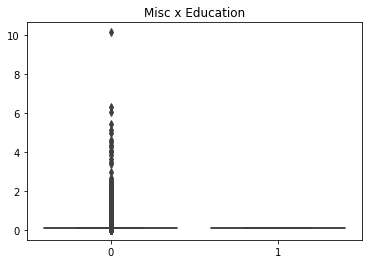

In [87]:
sns.boxplot(data=[dataMisc, dataEducation]).set_title('Misc x Education')

In [88]:
stats.mannwhitneyu(dataMisc,dataEducation)

MannwhitneyuResult(statistic=56580.0, pvalue=0.4843553825980074)

* Hipotese 2 
    * Jogos vendem mais de acordo com a Plataforma ? Jogos da plataforma mais popular vendem mais?

In [106]:
Games_dados.Platform.describe()

count     55792
unique       74
top          PC
freq      10978
Name: Platform, dtype: object

In [108]:
print('Plataformas mais vendidas ',Games_dados.groupby('Platform')['Global_Sales_GenMed'].sum().sort_values(ascending=False).head())

print('\n','Plataformas menos vendidas ',Games_dados.groupby('Platform')['Global_Sales_GenMed'].sum().sort_values(ascending = True).head())

Plataformas mais vendidas  Platform
PS2     1262.445
PC      1215.250
PS3      963.150
X360     936.970
PS       796.270
Name: Global_Sales_GenMed, dtype: float64

 Plataformas menos vendidas  Platform
C128    0.040
Aco     0.090
BBCM    0.090
TG16    0.270
CD32    0.335
Name: Global_Sales_GenMed, dtype: float64


Text(0.5, 1.0, 'PC x PS2')

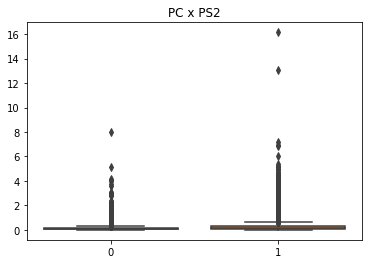

In [109]:
# mais popular no dataset
dataPC = Games_dados[Games_dados['Platform'] == 'PC']['Global_Sales_GenMed']

# mais vendido
dataPS2 = Games_dados[Games_dados['Platform'] == 'PS2']['Global_Sales_GenMed']

# menos vendido
dataC128 = Games_dados[Games_dados['Platform'] == 'C128']['Global_Sales_GenMed']

sns.boxplot(data=[dataPC, dataPS2]).set_title('PC x PS2')

In [110]:
stats.mannwhitneyu(dataPC,dataPS2)

MannwhitneyuResult(statistic=13327509.0, pvalue=1.6997402621346302e-182)

Text(0.5, 1.0, 'PC x C123')

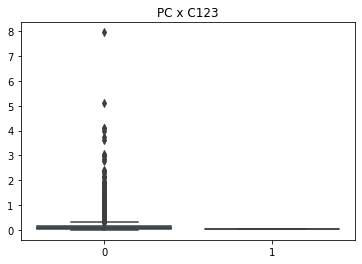

In [111]:
sns.boxplot(data=[dataPC, dataC128]).set_title('PC x C123')

In [112]:
stats.mannwhitneyu(dataPC,dataC128)

MannwhitneyuResult(statistic=1964.0, pvalue=0.13122512224814448)